In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
import dtale

In [3]:
df = pd.read_csv('Insurance_data_processed_imputed.csv')
df.head()

age     bmi  children       charges sex smoker     region
0  19.0  27.900       0.0  16884.924000   F    yes  southwest
1  18.0  33.770       1.0   1725.552300   M     no  southeast
2  28.0  33.000       3.0  13424.206937   M     no  southeast
3  33.0  22.705       0.0  13424.206937   M     no  northwest
4  32.0  28.880       0.0  13424.206937   M     no  northwest

In [4]:
dtale.show(df)

In [5]:
df.shape

(1326, 7)

In [6]:
df.isna().sum()

age         0
bmi         0
children    0
charges     0
sex         0
smoker      0
region      0
dtype: int64

In [7]:
dupl = df.duplicated()
dupl.sum()

np.int64(0)

In [8]:
# from ydata_profiling import ProfileReport

In [9]:
# report = ProfileReport(df, minimal=True)
# report.to_notebook_iframe()

### visualize categorical variables

In [10]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region'], dtype='object')

<Axes: xlabel='sex', ylabel='count'>

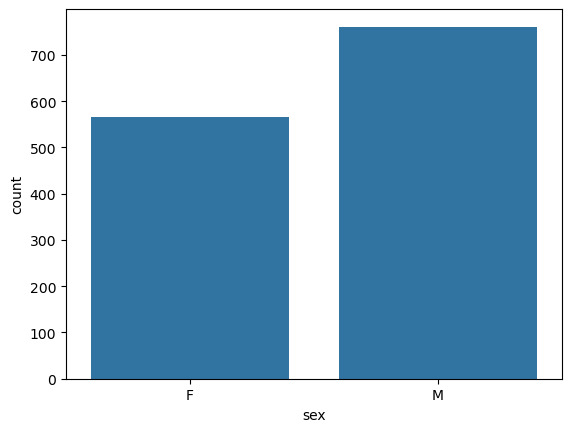

In [11]:
sns.countplot(data=df, x='sex' )

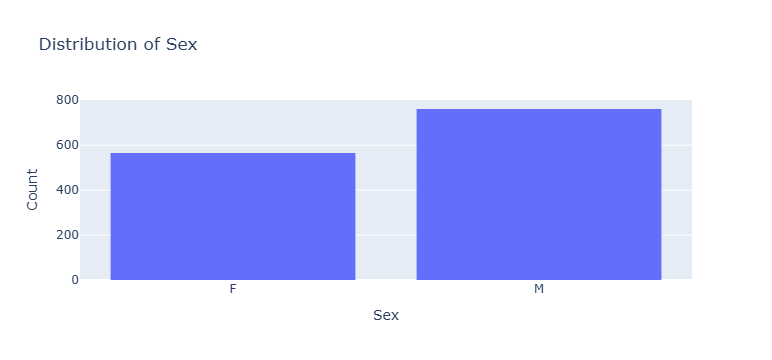

In [12]:
fig = px.histogram(df, x='sex', title='Distribution of Sex', labels={'sex': 'Sex', 'count': 'Count'})

# Customize layout
fig.update_layout(
    xaxis_title='Sex',
    yaxis_title='Count',
    showlegend=False
)

# Show the plot
fig.show()

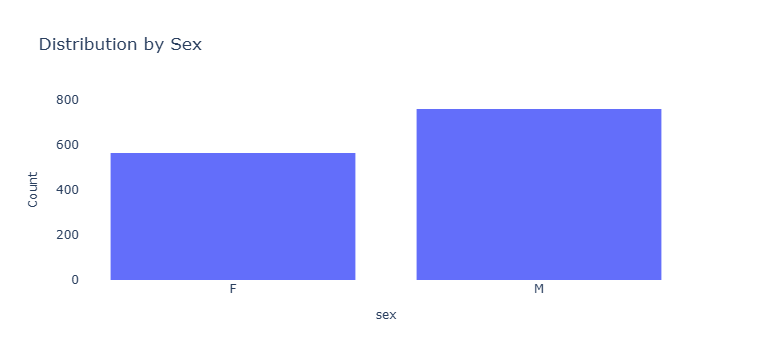

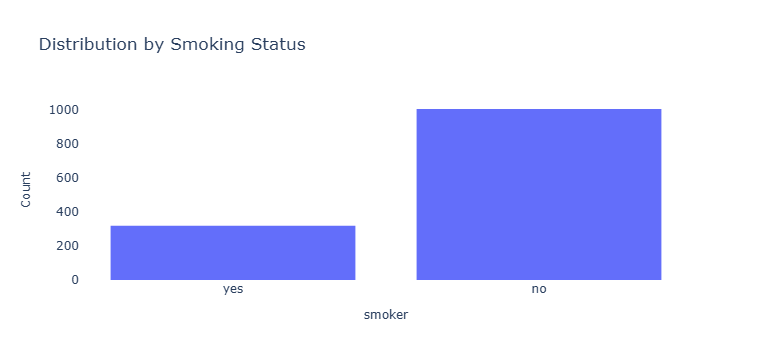

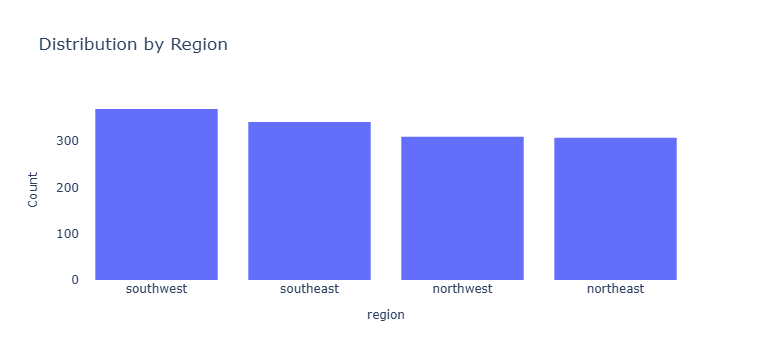

In [82]:
import plotly.express as px
import pandas as pd

# Get the data


# Create subplots for each categorical variable
fig1 = px.histogram(df, x='sex', title='Distribution by Sex')
fig2 = px.histogram(df, x='smoker', title='Distribution by Smoking Status')
fig3 = px.histogram(df, x='region', title='Distribution by Region')

# Update layouts
for fig in [fig1, fig2, fig3]:
    fig.update_layout(
        showlegend=False,
        plot_bgcolor='white',
        bargap=0.2
    )
    fig.update_xaxes(title_font=dict(size=12))
    fig.update_yaxes(title='Count', title_font=dict(size=12))

fig1.show()
fig2.show()
fig3.show()

In [13]:
sex_counts = df.sex.value_counts()
smoker_counts = df.smoker.value_counts()
region_counts = df.region.value_counts()

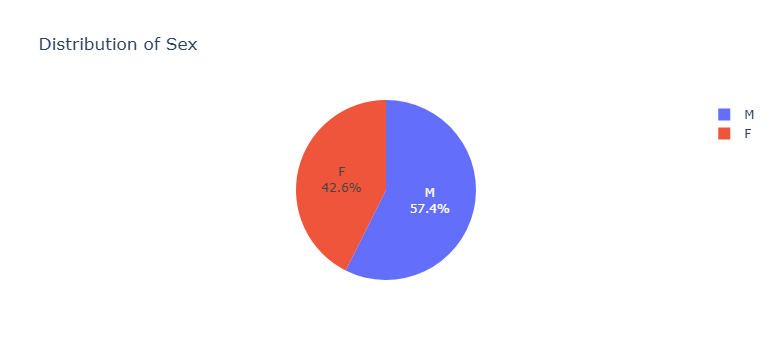

In [14]:

fig = px.pie(sex_counts, values=sex_counts.values, names=sex_counts.index, title='Distribution of Sex')

# Customize layout
fig.update_traces(textposition='inside', textinfo='percent+label')  # Show percentage and label inside slices

# Show the plot
fig.show()

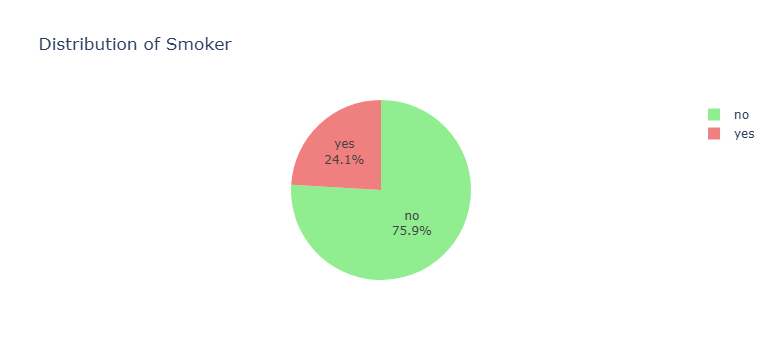

In [15]:
fig = px.pie(
    smoker_counts, 
    values=smoker_counts.values, 
    names=smoker_counts.index, 
    title='Distribution of Smoker',
    color_discrete_sequence=['lightgreen', 'lightcoral']  # Custom colors
)

# Customize layout
fig.update_traces(textposition='inside', textinfo='percent+label')  # Show percentage and label inside slices

# Show the plot
fig.show()

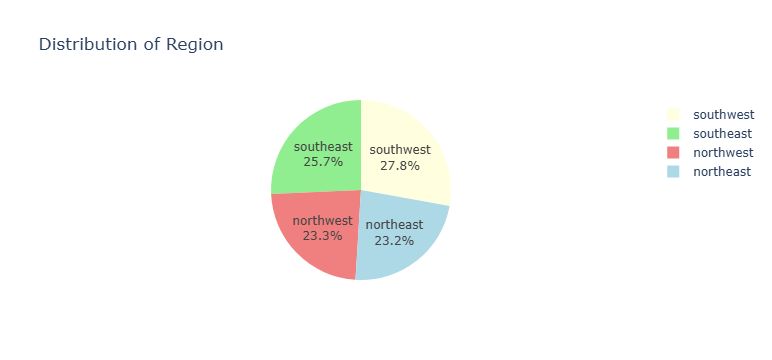

In [16]:
# Define a custom color map
color_map = {
    'northeast': 'lightblue',
    'southeast': 'lightgreen',
    'northwest': 'lightcoral',
    'southwest': 'lightyellow'
}

# Create a pie chart with custom colors
fig = px.pie(
    region_counts, 
    values=region_counts.values, 
    names=region_counts.index, 
    title='Distribution of Region',
    color=region_counts.index,  # Use the index for coloring
    color_discrete_map=color_map  # Map specific colors to regions
)

# Customize layout
fig.update_traces(textposition='inside', textinfo='percent+label')  # Show percentage and label inside slices

# Show the plot
fig.show()

In [17]:
df.head()

age     bmi  children       charges sex smoker     region
0  19.0  27.900       0.0  16884.924000   F    yes  southwest
1  18.0  33.770       1.0   1725.552300   M     no  southeast
2  28.0  33.000       3.0  13424.206937   M     no  southeast
3  33.0  22.705       0.0  13424.206937   M     no  northwest
4  32.0  28.880       0.0  13424.206937   M     no  northwest

## Create visualiztions for numerical variables

<Axes: xlabel='age', ylabel='Count'>

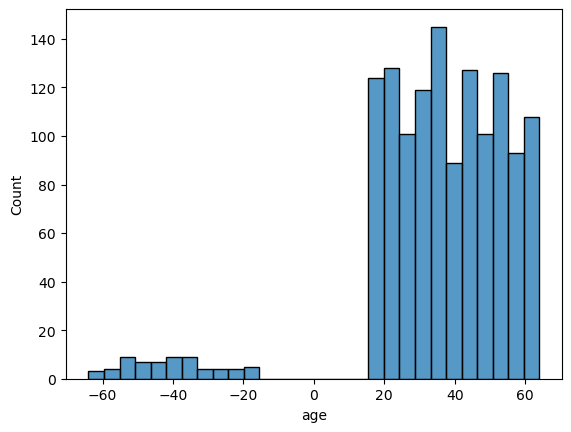

In [20]:
sns.histplot(data=df,x='age')

In [22]:
df[df.age == -20]

age    bmi  children    charges sex smoker     region
1137 -20.0  31.92       0.0  2261.5688   M     no  northwest

## I discovered that there are negative values ​​for age, and this is not normal.

In [25]:
negative_age = df[df['age'] < 0]
negative_age

age       bmi  children       charges sex smoker     region
5    -31.0  25.74000       0.0  13424.206937   F     no  southeast
14   -27.0  42.13000       0.0  39611.757700   M    yes  southeast
17   -23.0  23.84500       0.0  13424.206937   M     no  northeast
23   -34.0  30.56055       1.0  13424.206937   F    yes  southwest
79   -41.0  32.96500      -0.0  13424.206937   F     no  northwest
...    ...       ...       ...           ...  ..    ...        ...
1267 -39.0  29.92500       1.0  22462.043750   M    yes  northeast
1280 -19.0  34.90000       0.0  34828.654000   M    yes  southwest
1292 -43.0  27.80000       0.0  37829.724200   M    yes  southwest
1299 -33.0  26.69500       0.0   4571.413050   F     no  northwest
1322 -18.0  31.92000       0.0   2205.980800   F     no  northeast

[65 rows x 7 columns]

### replace negative age to positive age

In [26]:
df['age'] = df['age'].abs()

In [27]:
negative_age = df[df['age'] < 0]
negative_age

Empty DataFrame
Columns: [age, bmi, children, charges, sex, smoker, region]
Index: []

In [50]:
# sns.pairplot(data=df,hue='sex')

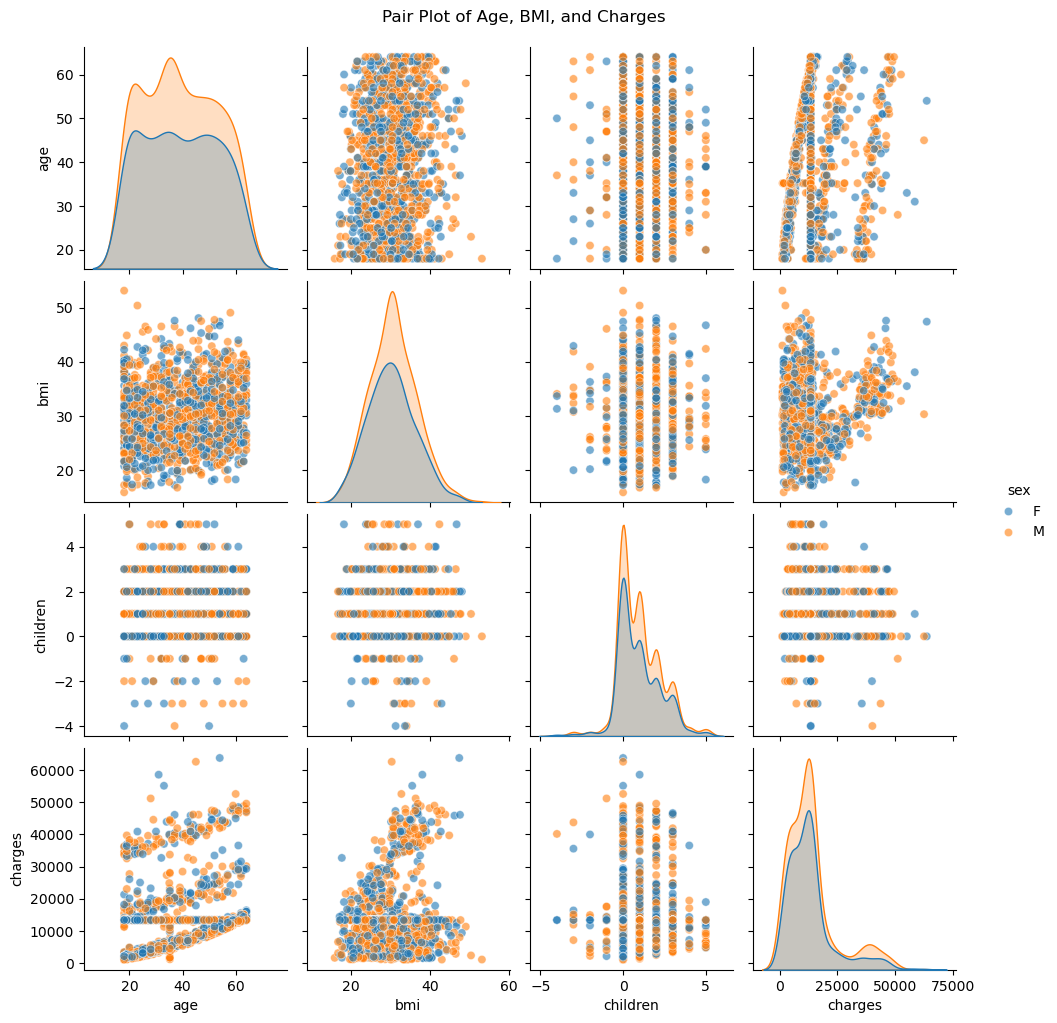

In [49]:
# 4. Pair Plot
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6},hue='sex')
plt.suptitle('Pair Plot of Age, BMI, and Charges', y=1.02)
plt.show()


<Axes: xlabel='age', ylabel='Count'>

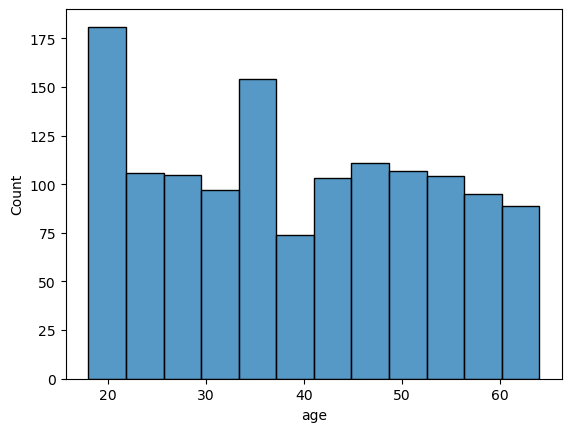

In [28]:
sns.histplot(data=df,x='age')

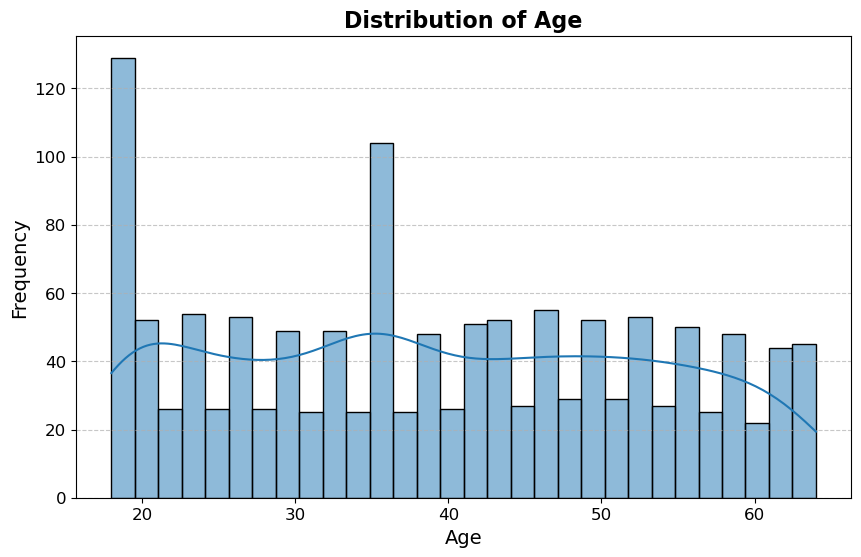

In [32]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(
    data=df, 
    x='age', 
    bins=30,  
    kde=True,  
)

# Add title and labels
plt.title('Distribution of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize grid and ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

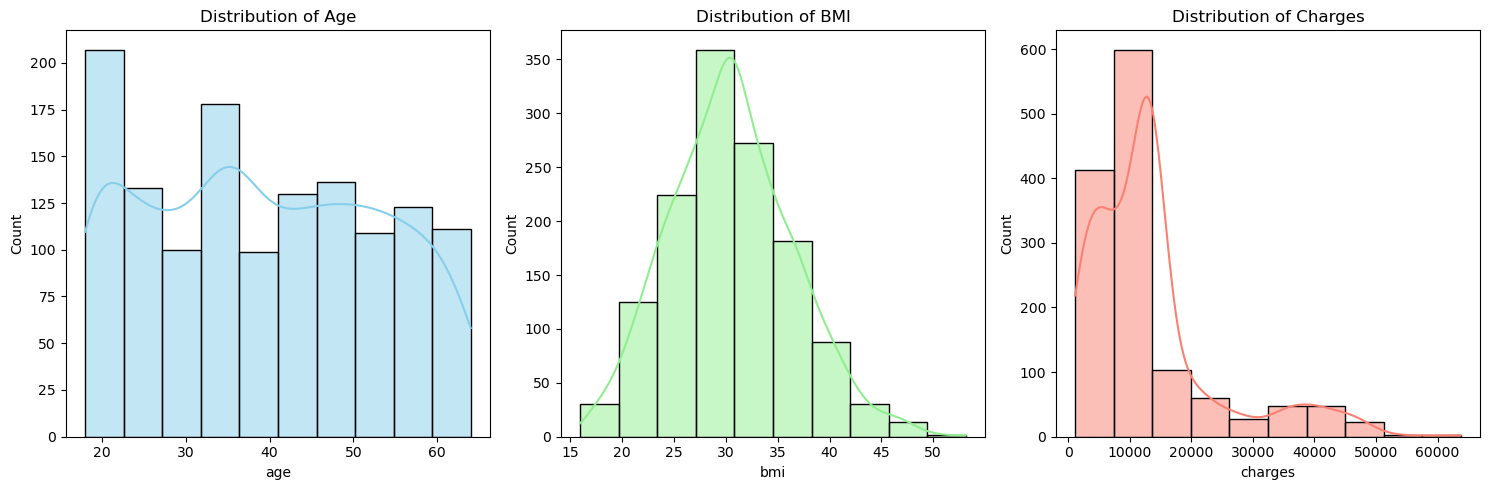

In [42]:
# 1. Histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of BMI')

plt.subplot(1, 3, 3)
sns.histplot(df['charges'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Charges')

plt.tight_layout()
plt.show()

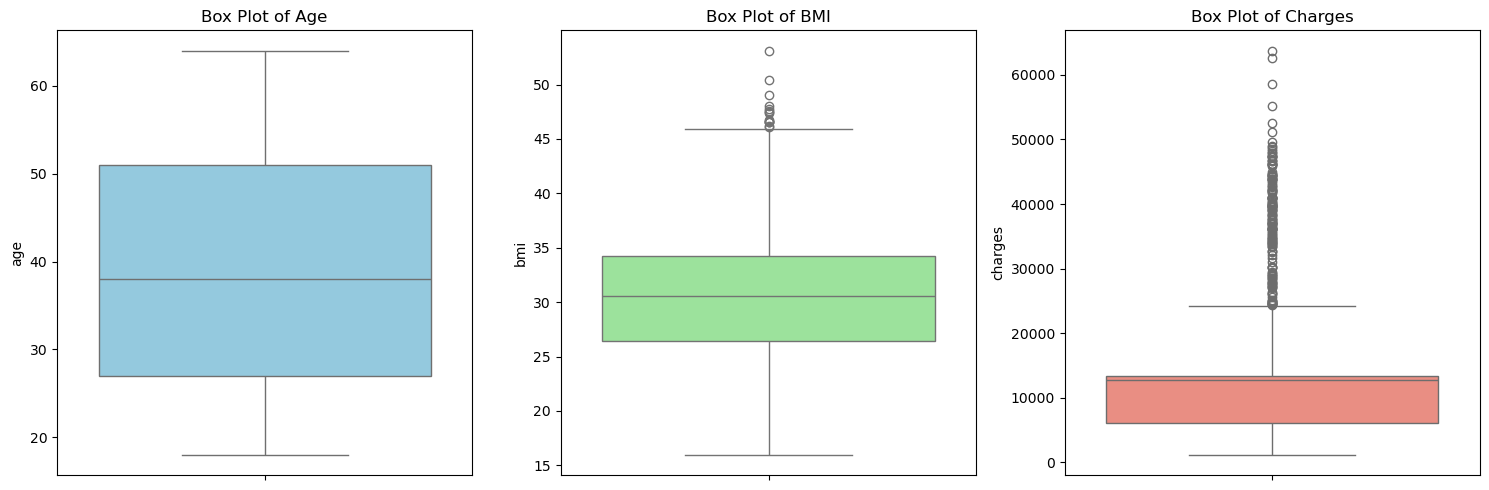

In [45]:
# 2. Box Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'], color='skyblue')
plt.title('Box Plot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['bmi'], color='lightgreen')
plt.title('Box Plot of BMI')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['charges'], color='salmon')
plt.title('Box Plot of Charges')

plt.tight_layout()
plt.show()


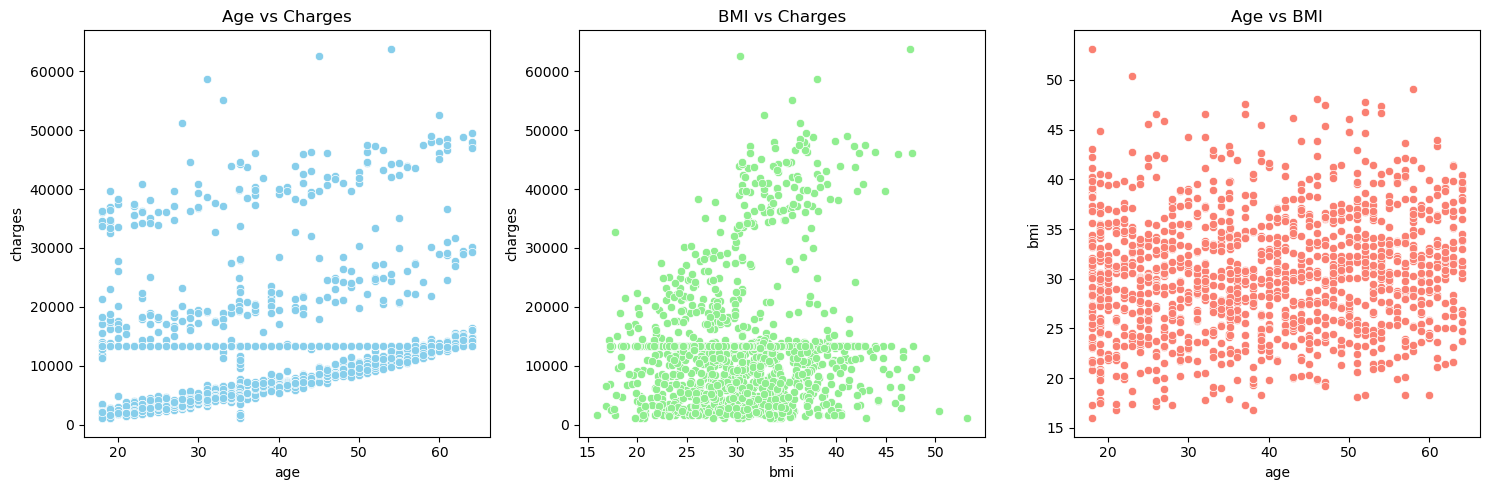

In [47]:
# 3. Scatter Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['age'], y=df['charges'], color='skyblue')
plt.title('Age vs Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['bmi'], y=df['charges'], color='lightgreen')
plt.title('BMI vs Charges')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['age'], y=df['bmi'], color='salmon')
plt.title('Age vs BMI')

plt.tight_layout()
plt.show()

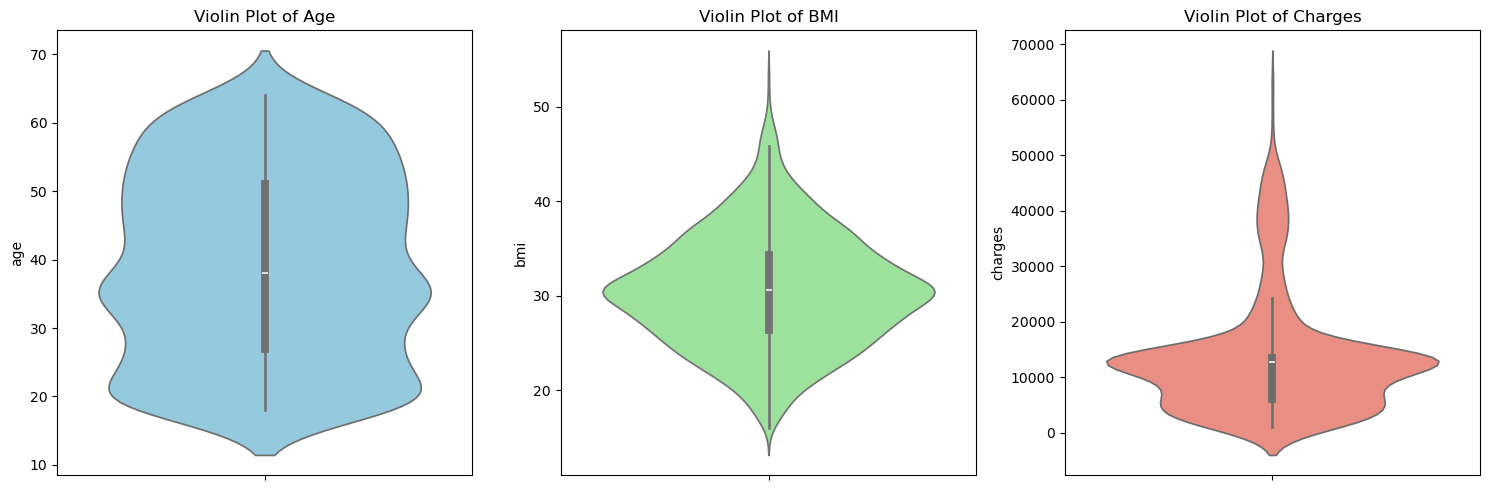

In [51]:
# 5. Violin Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.violinplot(y=df['age'], color='skyblue')
plt.title('Violin Plot of Age')

plt.subplot(1, 3, 2)
sns.violinplot(y=df['bmi'], color='lightgreen')
plt.title('Violin Plot of BMI')

plt.subplot(1, 3, 3)
sns.violinplot(y=df['charges'], color='salmon')
plt.title('Violin Plot of Charges')

plt.tight_layout()
plt.show()

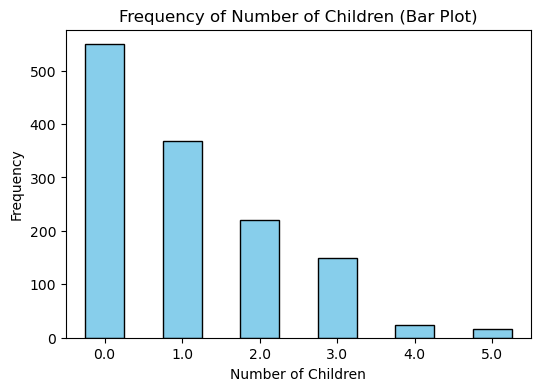

In [77]:
# 1. Bar Plot (Frequency of Each Value)
plt.figure(figsize=(6, 4))
df['children'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Number of Children (Bar Plot)')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [74]:
df['children'] = df['children'].abs()

In [76]:
df[df['children']<0]

Empty DataFrame
Columns: [age, bmi, children, charges, sex, smoker, region]
Index: []

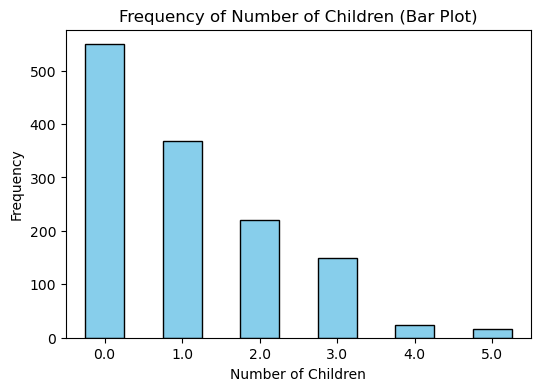

In [78]:
# 1. Bar Plot (Frequency of Each Value)
plt.figure(figsize=(6, 4))
df['children'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Number of Children (Bar Plot)')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


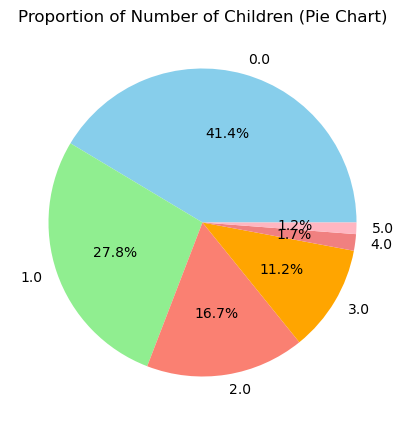

In [79]:
# 3. Pie Chart (Proportion of Each Value)
plt.figure(figsize=(8, 5))
df['children'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'lightpink'])
plt.title('Proportion of Number of Children (Pie Chart)')
plt.ylabel('')  # Remove the y-label
plt.show()

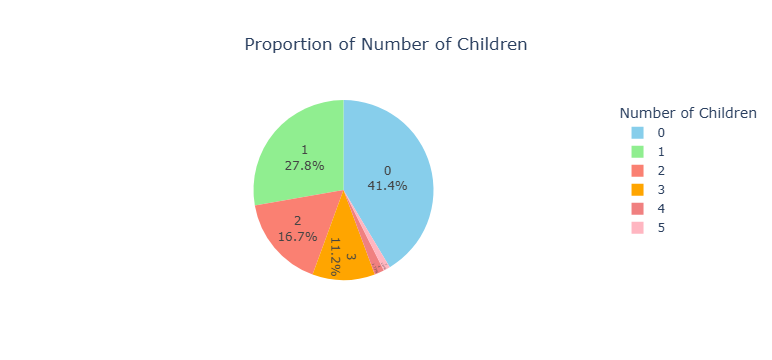

In [80]:
# Count the occurrences of each unique value in 'children'
children_counts = df['children'].value_counts().reset_index()
children_counts.columns = ['children', 'count']

# Create a pie chart using Plotly
fig = px.pie(
    children_counts, 
    values='count', 
    names='children', 
    title='Proportion of Number of Children',
    color_discrete_sequence=['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'lightpink']  # Custom colors
)

# Update layout for better appearance
fig.update_traces(textposition='inside', textinfo='percent+label')  # Show percentage and label inside slices
fig.update_layout(
    showlegend=True,  # Show legend
    legend_title_text='Number of Children',  # Legend title
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

In [52]:
from scipy.stats import iqr

In [54]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region'], dtype='object')

In [58]:
age_iqr = iqr(df['age'])
age_iqr

np.float64(24.0)

In [56]:
bmi_iqr = iqr(df['bmi'])
bmi_iqr

np.float64(7.873750000000001)

In [59]:
charges_iqr = iqr(df['charges'])
charges_iqr

np.float64(7299.330974205997)

In [60]:
np.quantile(df['age'] , np.linspace(0,1,5))

array([18., 27., 38., 51., 64.])

In [61]:
lower_age = np.quantile(df['age'] , .25) - 1.5 * age_iqr
upper_age = np.quantile(df['age'] , .75) + 1.5 * age_iqr
print(lower_age ,"\n", upper_age)

-9.0 
 87.0


In [65]:
outliers_age = df[(df['age'] < lower_age) | (df['age'] > upper_age)]
outliers_age

Empty DataFrame
Columns: [age, bmi, children, charges, sex, smoker, region]
Index: []

In [62]:
np.quantile(df['bmi'], np.linspace(0,1,5))

array([15.96      , 26.4       , 30.56055031, 34.27375   , 53.13      ])

In [64]:
lower_bmi = np.quantile(df['bmi'], 0.25) - 1.5 * bmi_iqr
upper_bmi = np.quantile(df['bmi'], 0.75) + 1.5 * bmi_iqr
print(lower_bmi ,"\n", upper_bmi)

-9.600000000000001 
 70.27375


In [66]:
outliers_bmi = df[(df['bmi'] < lower_bmi) | (df['bmi'] > upper_bmi)]
outliers_bmi

Empty DataFrame
Columns: [age, bmi, children, charges, sex, smoker, region]
Index: []

In [67]:
np.quantile(df['charges'], np.linspace(0,1,5))

array([ 1131.5066    ,  6124.8759625 , 12689.8515    , 13424.20693671,
       63770.42801   ])

In [68]:
lower_charges = np.quantile(df['charges'], 0.25) - 1.5 * charges_iqr
upper_charges = np.quantile(df['charges'], 0.75) + 1.5 * charges_iqr
print(lower_charges ,"\n", upper_charges)

-4824.120498808996 
 24373.203398014994


In [110]:
outliers_charges = df[(df['charges'] < lower_charges) | (df['charges'] > upper_charges)]
outliers_charges

age     bmi  children      charges sex smoker     region
9     60.000000  25.840       0.0  28923.13692   F     no  northwest
11    62.000000  26.290       0.0  27808.72510   F    yes  southeast
14    27.000000  42.130       0.0  39611.75770   M    yes  southeast
19    30.000000  35.300       0.0  36837.46700   M    yes  southwest
29    31.000000  36.300       2.0  38711.00000   M    yes  southwest
...         ...     ...       ...          ...  ..    ...        ...
1297  25.000000  30.200       0.0  33900.65300   F    yes  southwest
1301  19.000000  34.700       2.0  36397.57600   F    yes  southwest
1309  35.214623  26.695       1.0  28101.33305   M    yes  southwest
1311  42.000000  40.370       2.0  43896.37630   F    yes  southeast
1325  61.000000  29.070       0.0  29141.36030   F    yes  northwest

[166 rows x 7 columns]

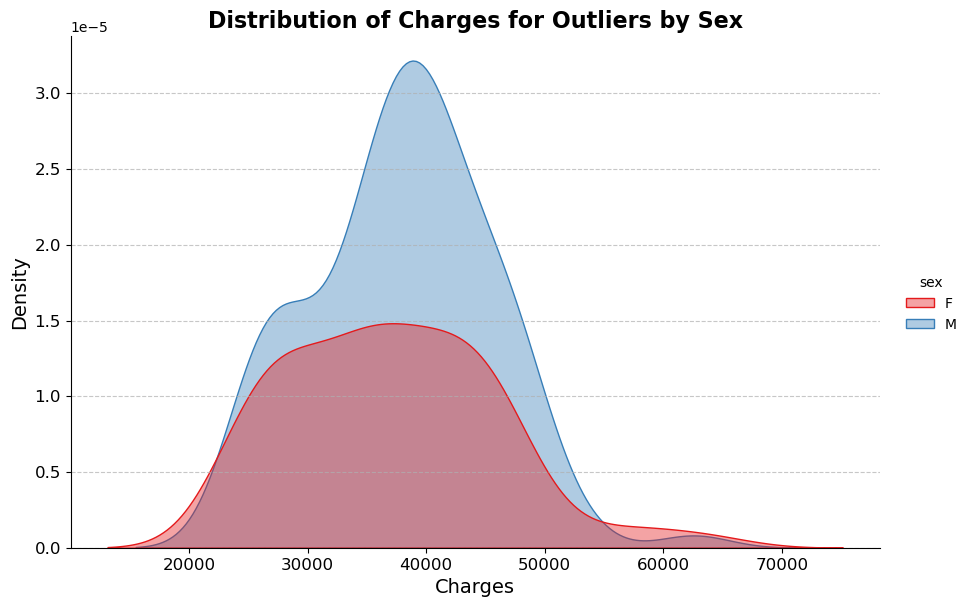

In [111]:
# Create a displot with optimizations
sns.displot(
    data=outliers_charges, 
    x='charges', 
    hue='sex',
    kind='kde',  # Use Kernel Density Estimate (KDE) for smooth distribution
    palette='Set1',  # Use a color palette for better distinction
    height=6,  # Set the height of the plot
    aspect=1.5,  # Set the aspect ratio (width = height * aspect)
    fill=True,  # Fill the area under the KDE curve
    alpha=0.4  # Set transparency for the filled area
)

# Add title and labels
plt.title('Distribution of Charges for Outliers by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize grid and ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

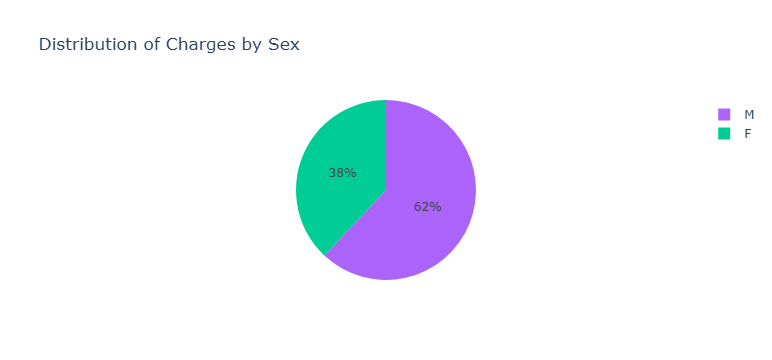

In [114]:
sex_charges = outliers_charges.groupby('sex')['charges'].sum().reset_index()

# Create Pie Chart with custom colors
fig = px.pie(sex_charges, 
             names='sex', 
             values='charges', 
             title='Distribution of Charges by Sex',
             color='sex',  # Assign colors based on 'sex'
             color_discrete_map={'Male': 'blue', 'Female': 'pink'})  # Custom color mapping

# Show the plot
fig.show()


In [115]:
outliers_charges.shape

(166, 7)

In [118]:
outliers_charges.describe()

age         bmi    children       charges
count  166.000000  166.000000  166.000000    166.000000
mean    42.030561   33.136282    1.102410  37589.681124
std     14.379921    5.120937    1.104424   7973.805083
min     18.000000   17.765000    0.000000  24393.622400
25%     30.000000   30.202500    0.000000  31742.166500
50%     44.000000   33.005000    1.000000  37545.988500
75%     54.000000   36.396250    2.000000  43186.678088
max     64.000000   47.600000    4.000000  63770.428010

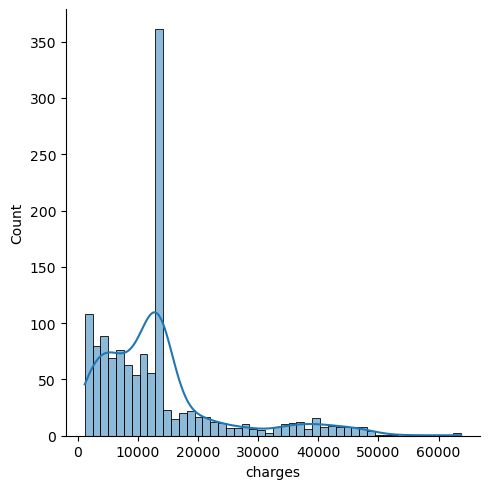

In [122]:
sns.displot(data=df,x='charges',kde=True)

# Log Transformation: Useful for right-skewed data.

In [123]:
df.to_csv('Final_Insurance_data_processed_imputed.csv',index=False)

In [124]:
df = pd.read_csv('Final_Insurance_data_processed_imputed.csv')
df.head()

age     bmi  children       charges sex smoker     region
0  19.0  27.900       0.0  16884.924000   F    yes  southwest
1  18.0  33.770       1.0   1725.552300   M     no  southeast
2  28.0  33.000       3.0  13424.206937   M     no  southeast
3  33.0  22.705       0.0  13424.206937   M     no  northwest
4  32.0  28.880       0.0  13424.206937   M     no  northwest

In [135]:
import dash
from dash import dcc, html, Input, Output, State
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd


# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])
app.title = "Insurance Data Dashboard"

# Define the layout
app.layout = dbc.Container(
    [
        # Title
        dbc.Row(
            dbc.Col(
                html.H1("Insurance Data Dashboard", className="text-center my-4"),
                width=12
            )
        ),

        # Sidebar and Main Content
        dbc.Row(
            [
                # Sidebar with filters
                dbc.Col(
                    [
                        html.H4("Filters", className="mb-3"),
                        html.Label("Sex"),
                        dcc.Dropdown(
                            id='sex-filter',
                            options=[{'label': 'All', 'value': 'All'}] + 
                                    [{'label': sex, 'value': sex} for sex in df['sex'].unique()],
                            value='All',
                            clearable=False,
                            className="mb-3"
                        ),
                        html.Label("Smoker"),
                        dcc.Dropdown(
                            id='smoker-filter',
                            options=[{'label': 'All', 'value': 'All'}] + 
                                    [{'label': smoker, 'value': smoker} for smoker in df['smoker'].unique()],
                            value='All',
                            clearable=False,
                            className="mb-3"
                        ),
                        html.Label("Region"),
                        dcc.Dropdown(
                            id='region-filter',
                            options=[{'label': 'All', 'value': 'All'}] + 
                                    [{'label': region, 'value': region} for region in df['region'].unique()],
                            value='All',
                            clearable=False,
                            className="mb-3"
                        ),
                        html.Hr(),
                        html.H4("Summary Statistics", className="mt-3"),
                        html.Div(id='summary-table'),
                        html.Hr(),
                        html.Button("Download Filtered Data", id="btn-download", className="btn btn-primary mt-3"),
                        dcc.Download(id="download-dataframe-csv")
                    ],
                    md=3,
                    className="bg-light p-4"
                ),

                # Main content with visualizations
                dbc.Col(
                    [
                        dbc.Row(
                            [
                                dbc.Col(dcc.Graph(id='age-histogram')),  # fig1
                                dbc.Col(dcc.Graph(id='charges-boxplot'))  # fig2
                            ],
                            className="mb-4"
                        ),
                        dbc.Row(
                            [
                                dbc.Col(dcc.Graph(id='bmi-scatterplot')),  # fig3
                                dbc.Col(dcc.Graph(id='region-piechart'))  # fig4
                            ]
                        )
                    ],
                    md=9
                )
            ]
        )
    ],
    fluid=True
)

# Callback to update visualizations and summary table
@app.callback(
    [Output('age-histogram', 'figure'),
     Output('charges-boxplot', 'figure'),
     Output('bmi-scatterplot', 'figure'),
     Output('region-piechart', 'figure'),
     Output('summary-table', 'children'),
     Output('download-dataframe-csv', 'data')],
    [Input('sex-filter', 'value'),
     Input('smoker-filter', 'value'),
     Input('region-filter', 'value'),
     Input('btn-download', 'n_clicks')],
    prevent_initial_call=True
)
def update_dashboard(sex, smoker, region, n_clicks):
    # Filter the data based on the selected filters
    filtered_df = df.copy()
    if sex != 'All':
        filtered_df = filtered_df[filtered_df['sex'] == sex]
    if smoker != 'All':
        filtered_df = filtered_df[filtered_df['smoker'] == smoker]
    if region != 'All':
        filtered_df = filtered_df[filtered_df['region'] == region]

    # Create visualizations
    fig1 = px.histogram(filtered_df, x='age', title='Distribution of Age', color_discrete_sequence=['#1f77b4'])
    fig2 = px.box(filtered_df, x='sex', y='charges', title='Charges by Sex', color_discrete_sequence=['#ff7f0e'])
    fig3 = px.scatter(filtered_df, x='bmi', y='charges', color='smoker', title='BMI vs Charges by Smoker')
    fig4 = px.pie(filtered_df, names='region', title='Distribution by Region', color_discrete_sequence=px.colors.qualitative.Pastel)

    # Create summary statistics table
    summary_table = dbc.Table.from_dataframe(
        filtered_df.describe().round(2),
        striped=True,
        bordered=True,
        hover=True,
        responsive=True
    )

    # Download filtered data as CSV
    if n_clicks:
        return fig1, fig2, fig3, fig4, summary_table, dcc.send_data_frame(filtered_df.to_csv, "filtered_data.csv")
    else:
        return fig1, fig2, fig3, fig4, summary_table, dash.no_update

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
